### Importing dependcies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import missingno as mn
import seaborn as sns

### Importing dataset

In [2]:
base_df = pd.read_csv('zomato_restaurants_in_India.csv')

### Exploring dataset

In [3]:
#Display dataset
base_df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1


In [4]:
#Exploring shape of dataset
base_df.shape

(211944, 26)

In [5]:
#Exploring data types of each column
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

<Axes: >

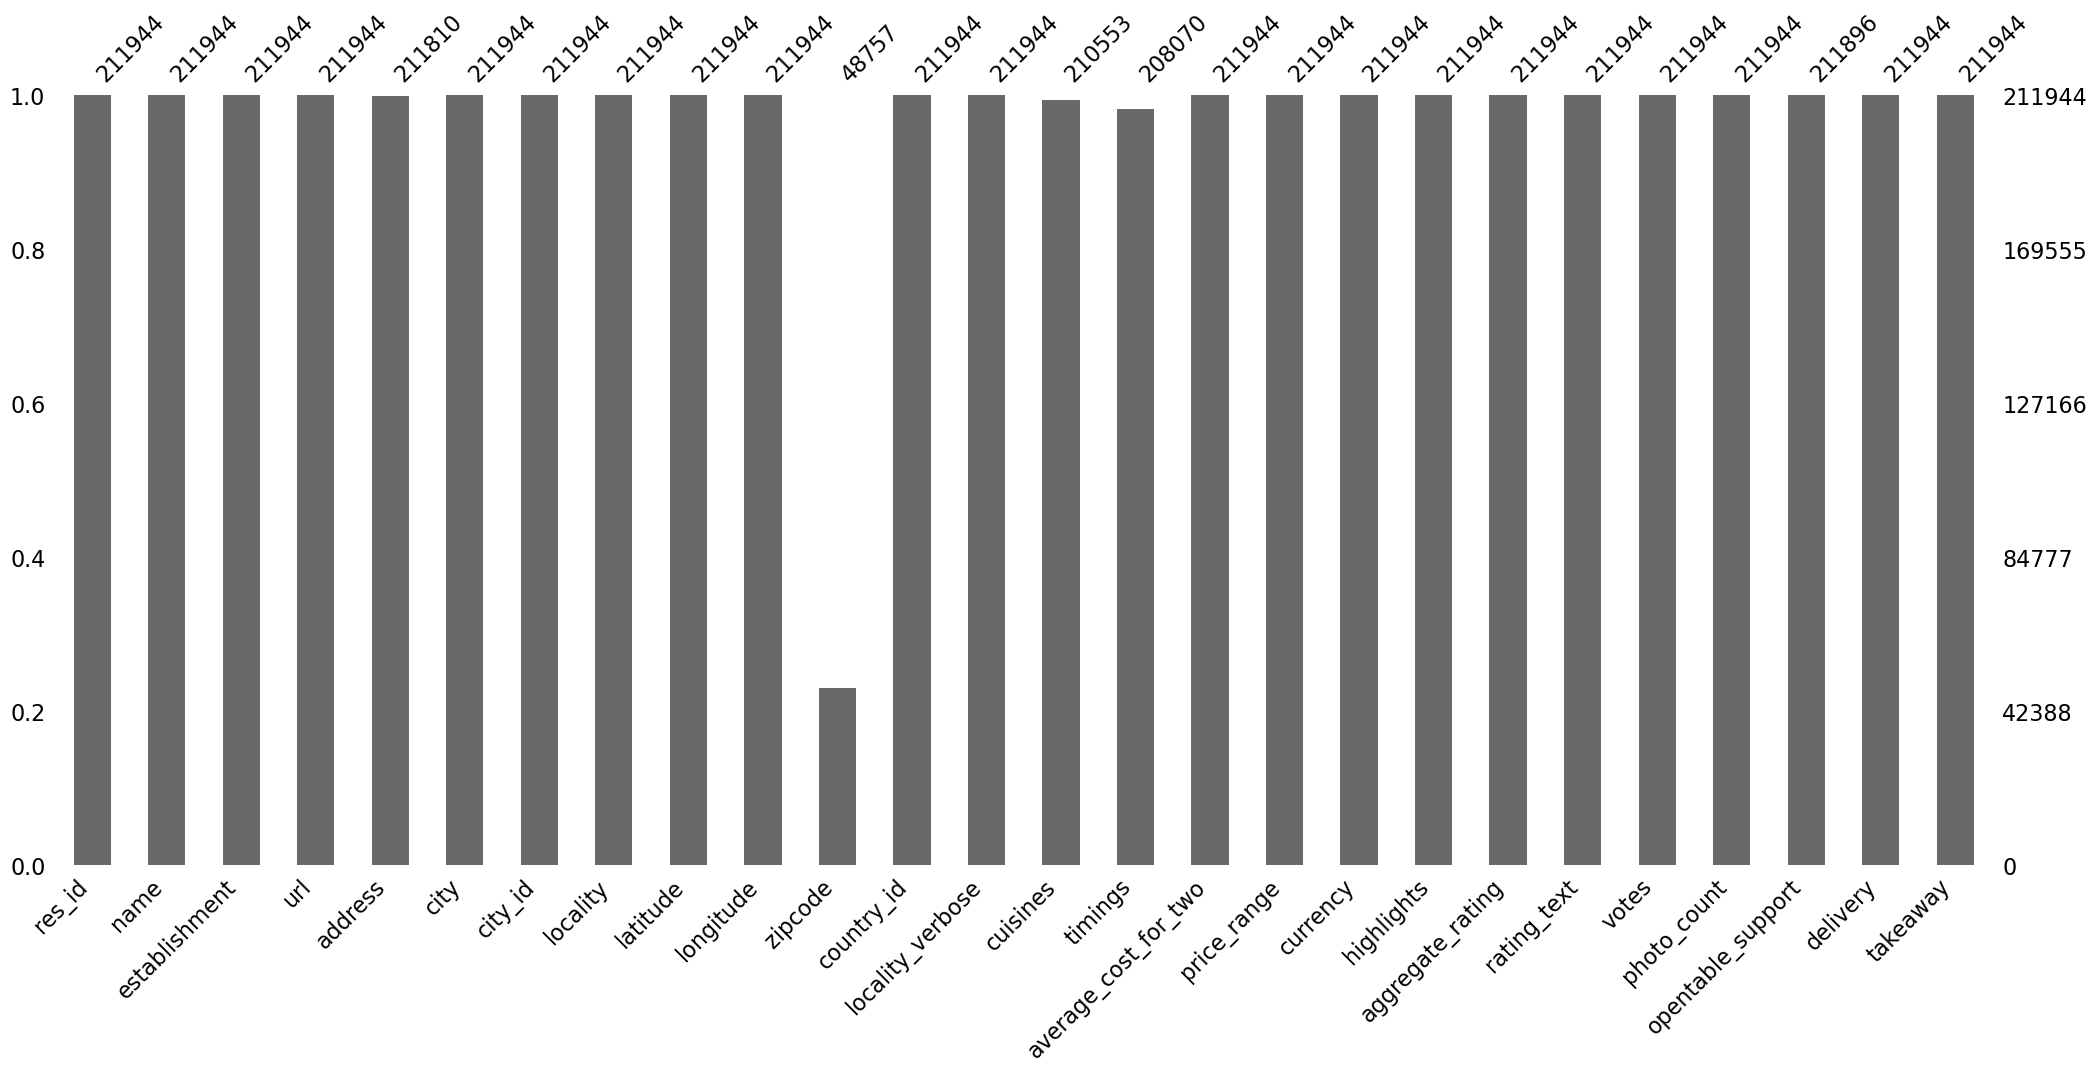

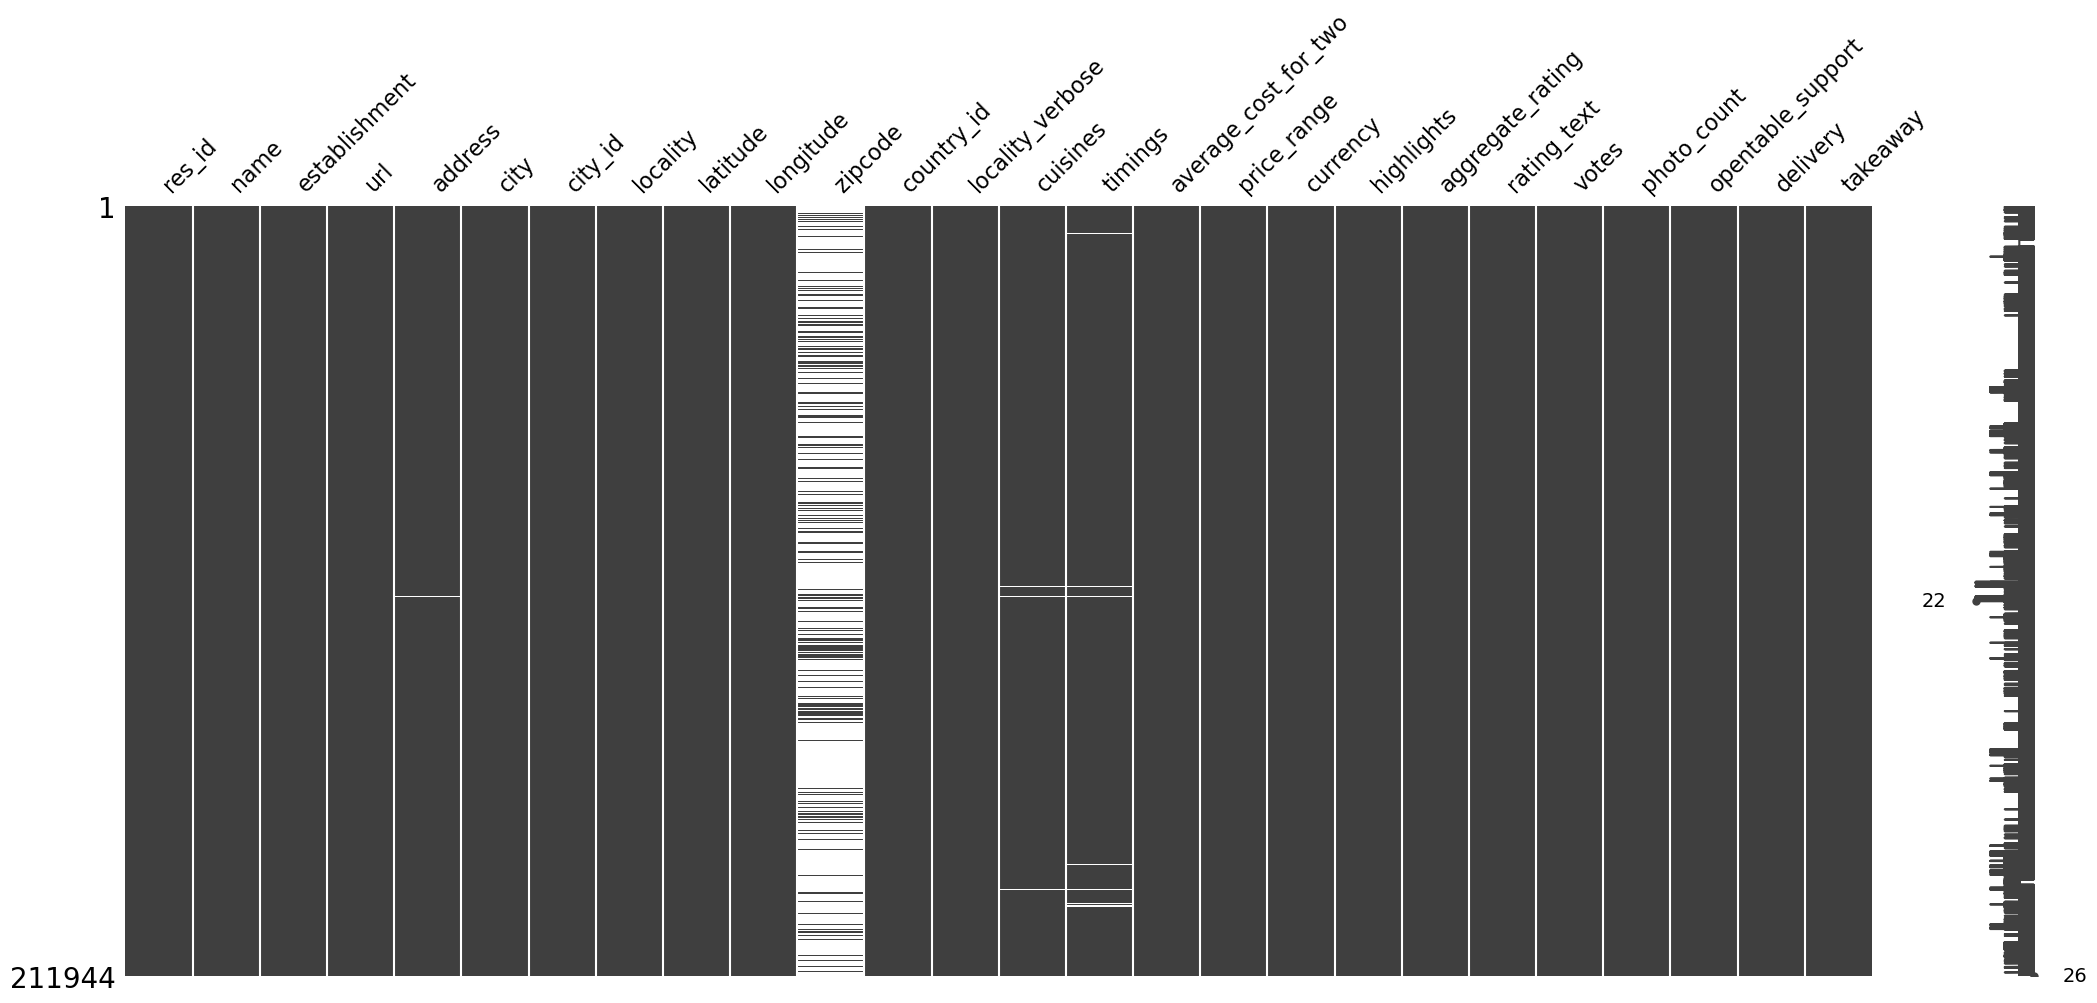

In [6]:
#Exploring data quality using missingno library to visualize missing data
mn.bar(base_df)
mn.matrix(base_df)

### Data preparation and cleaing

In [7]:
#Creating a copy of original data set
df= base_df.copy()

In [8]:
#Removing duplicate values
df.drop_duplicates(['res_id'],keep='first',inplace=True)

#Exploring dataset shape after removing duplicates
df.shape

(55568, 26)

In [9]:
#Removing unnecessary columns
df.drop(columns=["url","zipcode","opentable_support","currency"], inplace=True)

#Exploring dataset shape after removing columns
df.shape

(55568, 22)

In [10]:
#Cleaing Values and handling missing values
df['timings'].unique()

array(['8:30am – 10:30pm (Mon-Sun)',
       '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)',
       '9:30 AM to 11 PM', ..., '8am – 2:30pm, 5pm – 10pm (Mon-Sun)',
       '8am – 3pm, 6:30pm – 11pm (Mon-Sun)',
       '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)'],
      dtype=object)

In [11]:
#Extracting days in a seprate column called days
df['days'] = df['timings'].str.extract(r'(\(.*?\))', expand=False)
#Replacing missing values in days as not defined
df['days'].fillna('Not Defined', inplace=True)
#Removing parenthesis from days column
df['days'] = df['days'].str.replace(r'[()]', '', regex=True)
df['days']

0                              Mon-Sun
1         Mon, Wed, Thu, Fri, Sat, Sun
2                          Not Defined
3                              Mon-Sun
4                          Not Defined
                      ...             
211882                     Not Defined
211925                     Not Defined
211926                     Not Defined
211940    Mon, Tue, Wed, Fri, Sat, Sun
211942                     Not Defined
Name: days, Length: 55568, dtype: object

In [12]:
#Extracting time from timing column
df['timings'] = df['timings'].str.replace(r'(\(.*?\))', '', regex=True).str.strip()
#Cleaning values in timing columns to a consistent format
df['timings'] = df['timings'].str.replace ('â€“', '-').str.replace (' â€“ ', '-').str.replace('12Midnight', '00:00').str.replace('12noon', '12:00 PM').str.replace('12 noon', '12:00 PM').str.replace('PM', ' PM').str.replace('AM', ' AM').str.replace('pm', ' PM').str.replace('am', ' AM').str.replace('12 Midnight', '00:00').str.replace('00:00', '00:00 AM').str.replace('to', '-')
df['timings'].fillna('Not Defined', inplace=True)
df['timings']

0                              8:30 AM – 10:30 PM
1           12:30 PM - 00:00 AM , 1 PM - 00:00 AM
2                               9:30  AM - 11  PM
3                                    8 AM – 11 PM
4                           11:30  AM - 11:30  PM
                           ...                   
211882                          11  AM - 00:00 AM
211925    11:30  AM - 3:30  PM, 7:30  PM - 11  PM
211926       11  AM - 3:30  PM, 7  PM - 10:30  PM
211940             4 PM – 11 PM , 4 PM – 11:30 PM
211942                              8  AM - 1  AM
Name: timings, Length: 55568, dtype: object

In [13]:
#Cleaning establishment column
df['establishment'] = df['establishment'].str.replace('[', '').str.replace(']', '').str.replace("''", "").str.replace("'", '')
df['establishment']

0             Quick Bites
1             Quick Bites
2             Quick Bites
3             Quick Bites
4           Casual Dining
               ...       
211882    Dessert Parlour
211925      Casual Dining
211926      Casual Dining
211940        Quick Bites
211942        Quick Bites
Name: establishment, Length: 55568, dtype: object

In [14]:
#Cleaning locality_verbose column
df['locality_verbose'] = df['locality_verbose'].str.replace(r',\s[^,]*$', '', regex=True)
df['locality_verbose']

0            Khandari
1          Agra Cantt
2            Shahganj
3         Civil Lines
4             Tajganj
             ...     
211882      Manjalpur
211925       Alkapuri
211926       Alkapuri
211940     Karelibaug
211942          Akota
Name: locality_verbose, Length: 55568, dtype: object

In [15]:
#Preparing cuisine column
df['cuisines_list'] = df['cuisines'].str.split(',')
df = df.explode('cuisines_list')
df=df.dropna(subset=['cuisines'])
df

,res_id,name,establishment,address,city,city_id,locality,latitude,longitude,country_id,...,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,delivery,takeaway,days,cuisines_list
0,3400299,Bikanervala,Quick Bites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,1,...,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1,-1,Mon-Sun,North Indian
0,3400299,Bikanervala,Quick Bites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,1,...,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1,-1,Mon-Sun,South Indian
0,3400299,Bikanervala,Quick Bites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,1,...,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1,-1,Mon-Sun,Mithai
0,3400299,Bikanervala,Quick Bites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,1,...,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1,-1,Mon-Sun,Street Food
0,3400299,Bikanervala,Quick Bites,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,1,...,2,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,-1,-1,Mon-Sun,Desserts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211926,18019952,Geeta lodge,Casual Dining,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,1,...,1,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,-1,-1,Not Defined,Street Food
211940,3200996,Raju Omlet,Quick Bites,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,1,...,1,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,1,-1,"Mon, Tue, Wed, Fri, Sat, Sun",Fast Food
211942,3201138,Subway,Quick Bites,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,1,...,2,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,1,-1,Not Defined,Fast Food
211942,3201138,Subway,Quick Bites,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,1,...,2,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,1,-1,Not Defined,Sandwich


<Axes: >

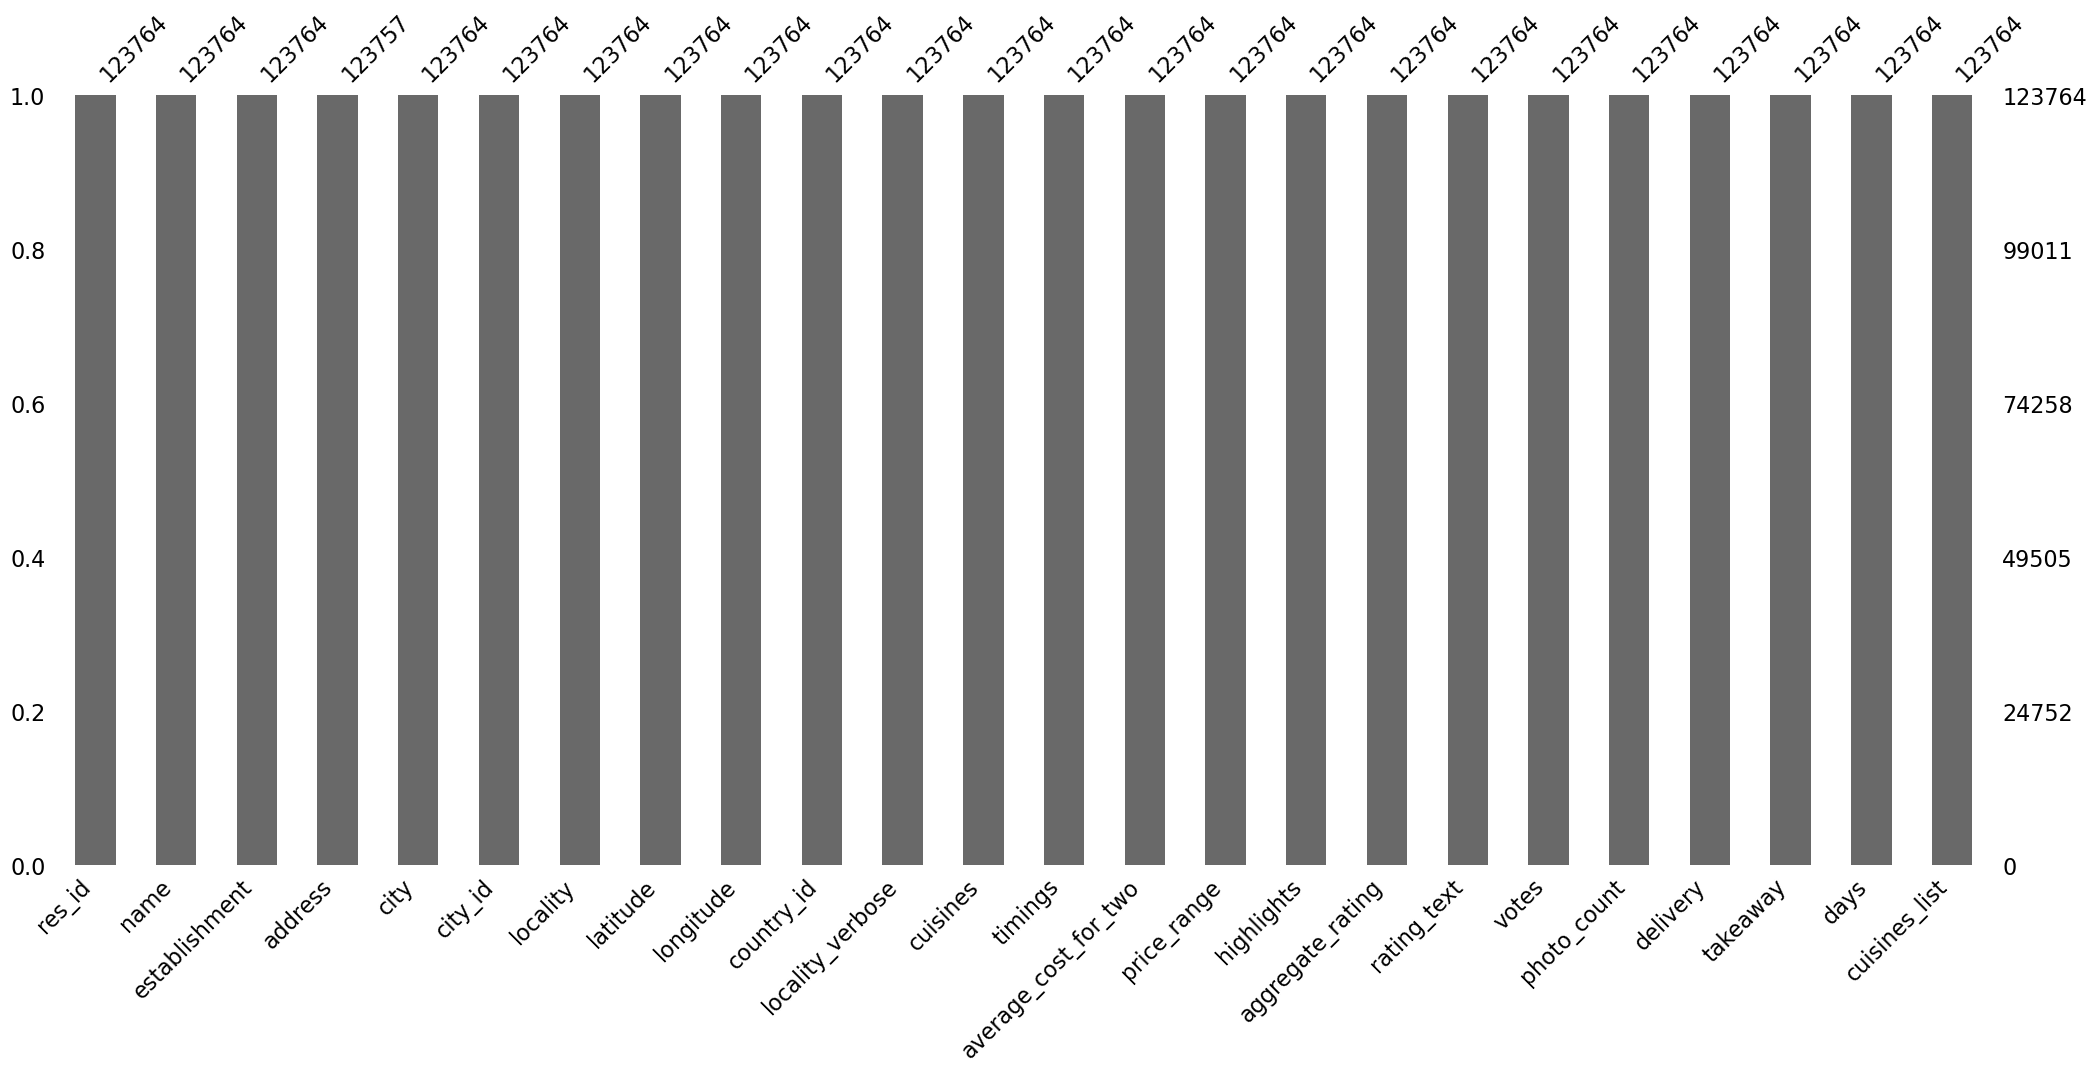

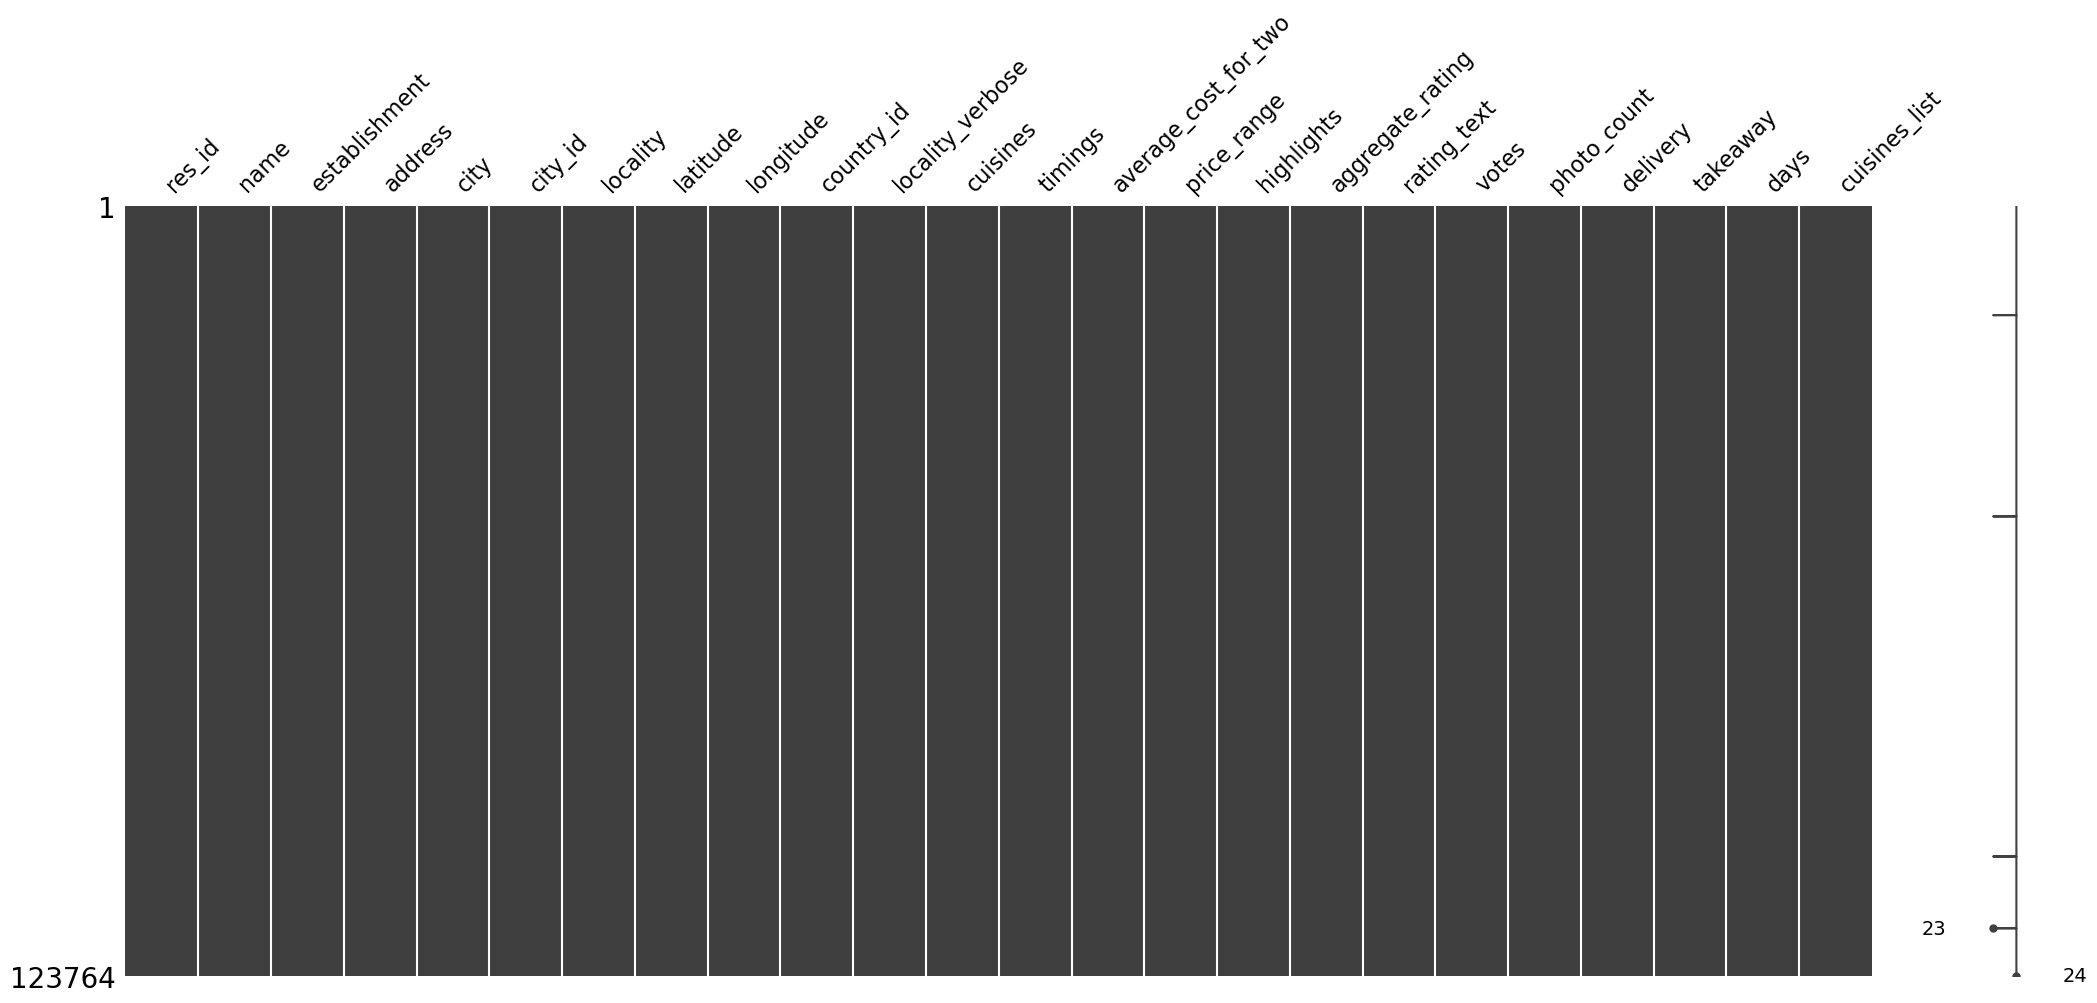

In [16]:
#Exploring data quality using missingno library to visualize missing data
mn.bar(df)
mn.matrix(df)

### Exploratory Data Analysis

In [17]:
#Finding out total number of restaurants registered on Zomato
number_of_resturants = df['name'].nunique()
print("Total number of resturants =", number_of_resturants)

Total number of resturants = 40757


In [18]:
#Finding out total number of outlets a restaurant have
outlets = df["name"].value_counts()
print(outlets)

name
Cafe Coffee Day                  1257
Domino's Pizza                    798
Subway                            651
Keventers                         567
Baskin Robbins                    513
                                 ... 
Serial Grillers                     1
Goan Speciality - The O Hotel       1
Poolside - VITS Hotel               1
The Sunflower                       1
Pandit Ji Samose Wale               1
Name: count, Length: 40757, dtype: int64


In [19]:
#Distributing Outlets into chains or single
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]
#Top 10 chains with respect to number of outlets
top10_chains = chains.head(10)

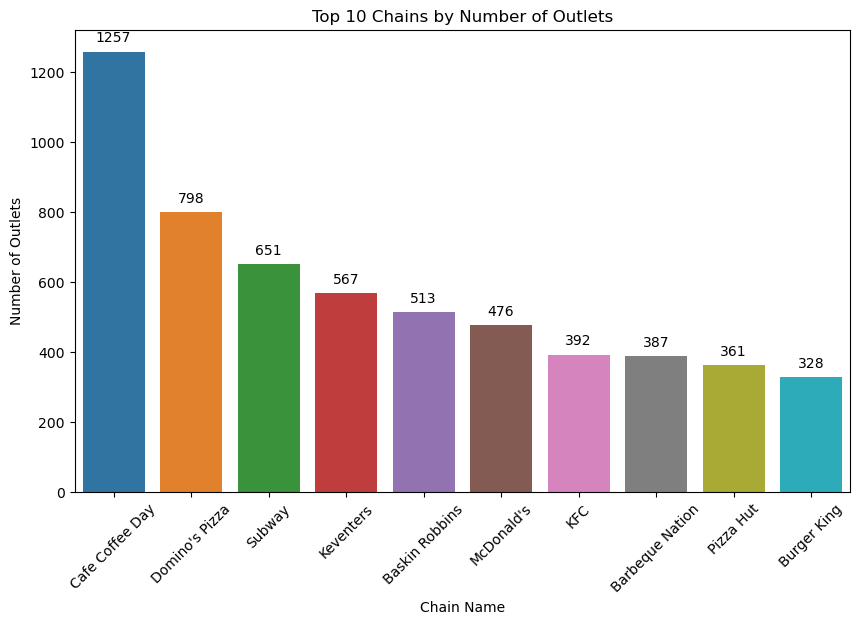

In [20]:
colors = sns.color_palette("tab10", len(top10_chains))

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top10_chains.index, y=top10_chains.values, palette=colors)

plt.title('Top 10 Chains by Number of Outlets')
plt.xlabel('Chain Name')
plt.ylabel('Number of Outlets')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')
plt.show()

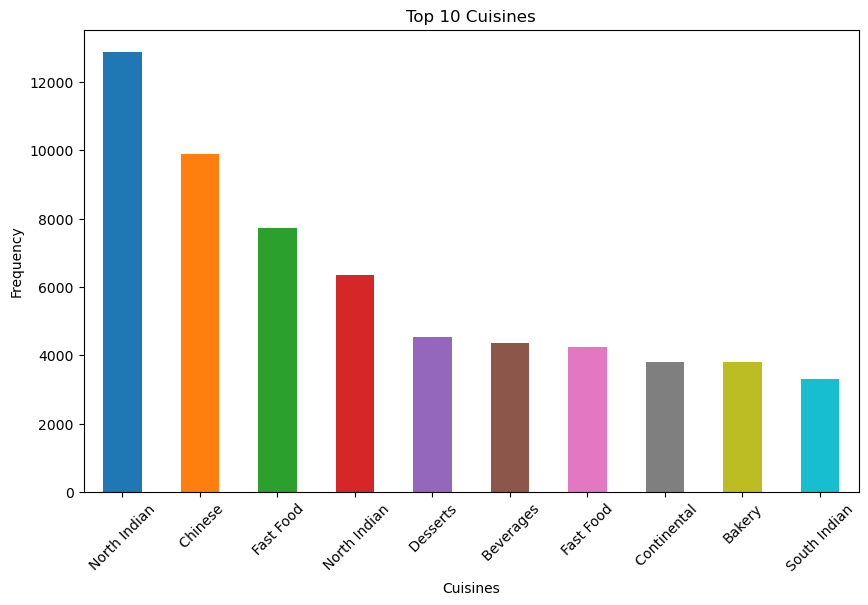

In [21]:
# Generate the value counts for the 'cuisines_list' column
cuisine_counts = df['cuisines_list'].value_counts()
pastel_colors = sns.color_palette("tab10", n_colors=10)
plt.figure(figsize=(10, 6))
# Plot the top 10 cuisines using the pastel color palette
cuisine_counts.head(10).plot(kind='bar', color=pastel_colors)

# Add labels to the plot
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.xlabel('Cuisines')
plt.title('Top 10 Cuisines')

# Show the plot
plt.show()

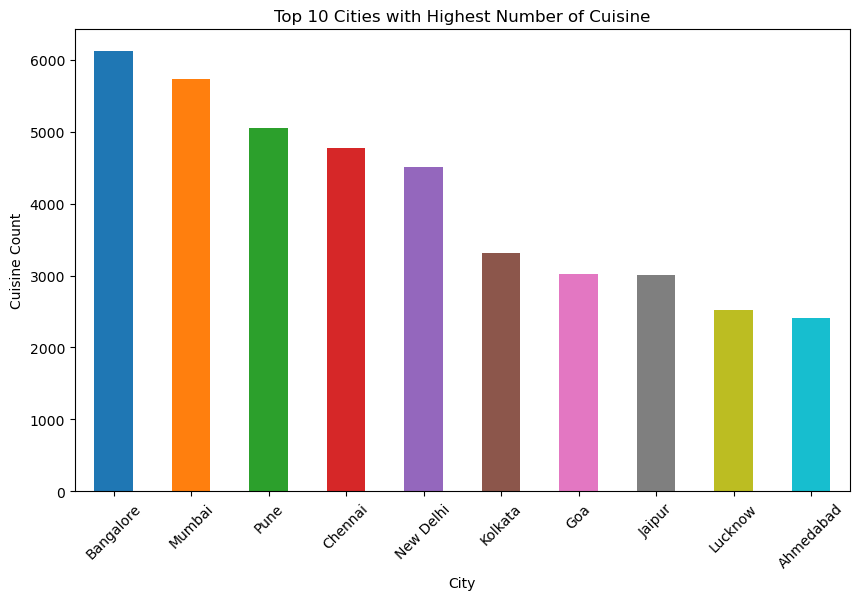

In [28]:

cu_list= df.groupby('city')['cuisines_list'].count()

top_10_cuisine_by_city = cu_list.nlargest(10)
pastel_colors = sns.color_palette("tab10", n_colors=10)
plt.figure(figsize=(10, 6))
top_10_cuisine_by_city.plot(kind='bar', color=pastel_colors)
plt.title('Top 10 Cities with Highest Number of Cuisine')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Cuisine Count')
plt.show()

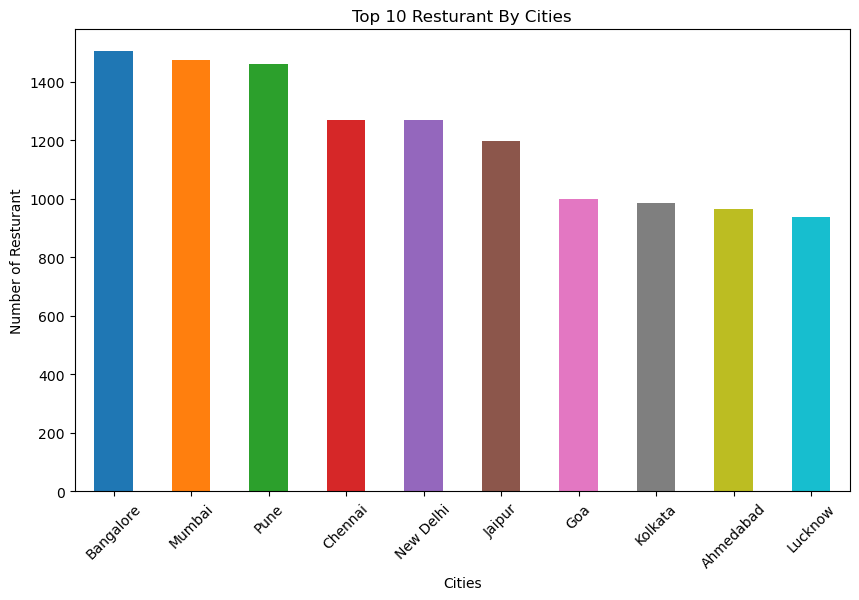

In [36]:
number_of_resturants =df.groupby('city')['name'].nunique()
plt.figure(figsize=(10,6))
Top_10_Resturant_By_Cities= number_of_resturants.nlargest(10)
pastel_colors = sns.color_palette("tab10", n_colors=10)
Top_10_Resturant_By_Cities.plot(kind='bar', color=pastel_colors)
plt.xticks(rotation=45)
plt.xlabel('Cities')
plt.ylabel('Number of Resturant')
plt.title("Top 10 Resturant By Cities")
plt.show()

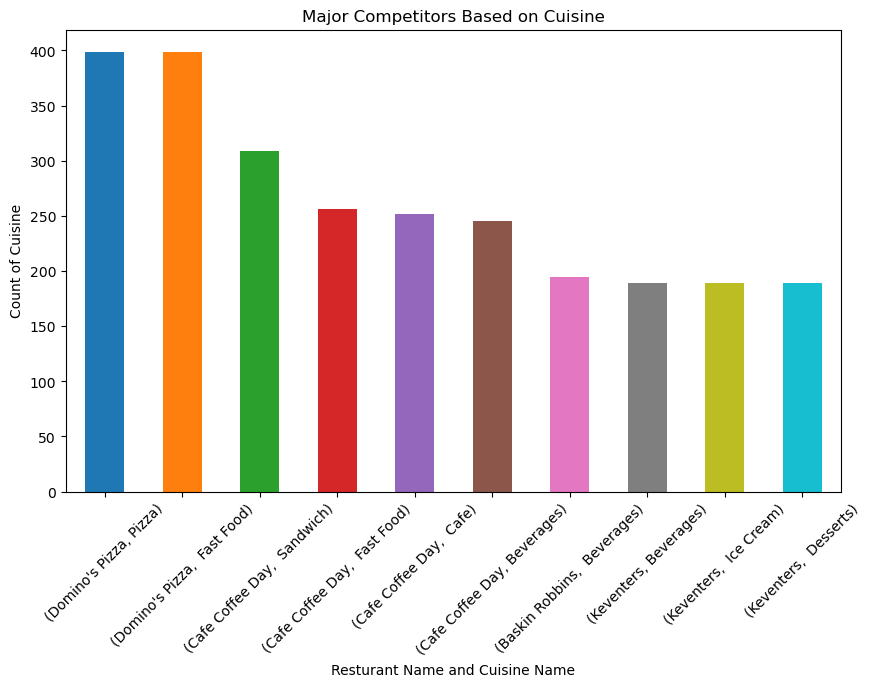

In [37]:
major_competitor=df.groupby('name')['cuisines_list'].value_counts()
plt.figure(figsize=(10,6))
pastel_colors = sns.color_palette("tab10", n_colors=10)
competitors=major_competitor.nlargest(10)
competitors.plot(kind='bar',color = pastel_colors)
plt.xticks(rotation=45)
plt.xlabel('Resturant Name and Cuisine Name')
plt.ylabel('Count of Cuisine')
plt.title('Major Competitors Based on Cuisine')
plt.show()

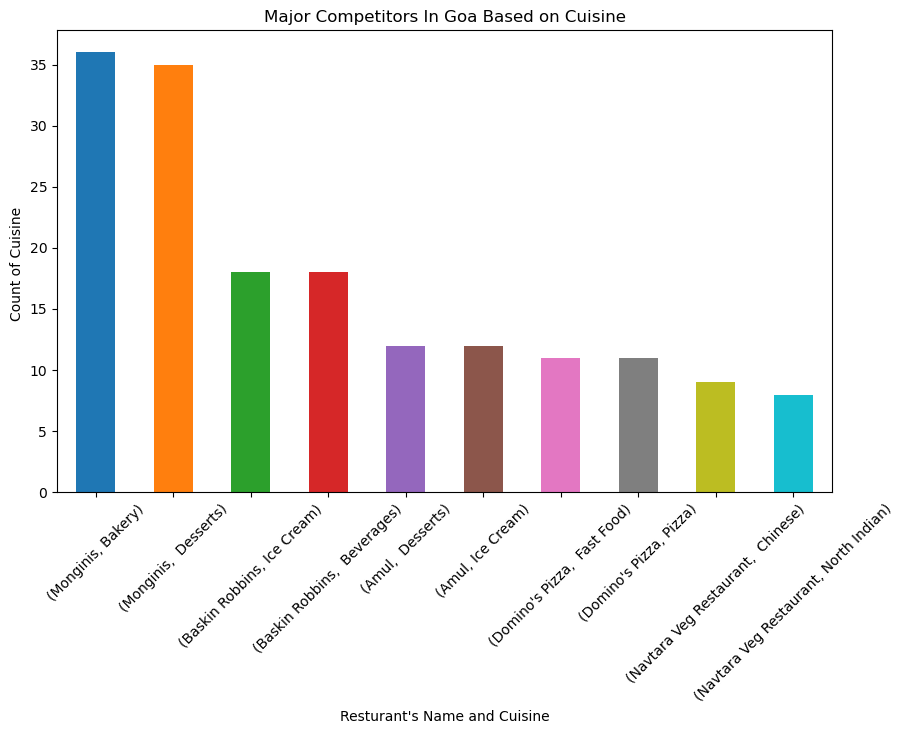

In [46]:
goa= df[df['city'] == 'Goa']
cusine_counts_goa = goa.groupby('name')['cuisines_list'].value_counts()
Top10=cusine_counts_goa.nlargest(10)
plt.figure(figsize=(10, 6))
pastel_colors = sns.color_palette("tab10", n_colors=10)
Top10.plot(kind='bar', color=pastel_colors)
plt.xticks(rotation=45)
plt.xlabel("Resturant's Name and Cuisine")
plt.ylabel('Count of Cuisine ')
plt.title('Major Competitors In Goa Based on Cuisine')
plt.show()

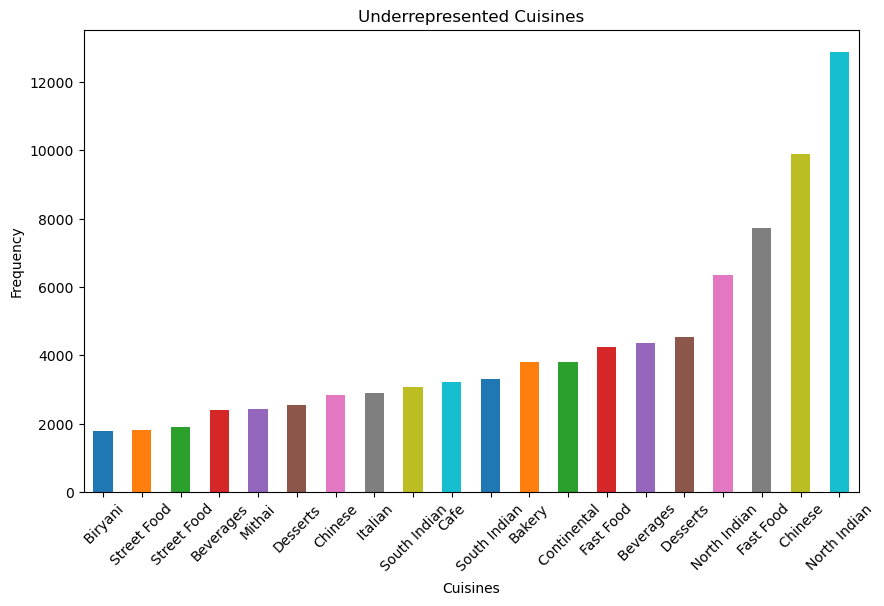

In [51]:
market_gap1 = df.groupby('cuisines_list')['cuisines_list'].value_counts().sort_values()
plt.figure(figsize=(10, 6))
pastel_colors = sns.color_palette("tab10", n_colors=10)
market_gap1.tail(20).plot(kind= 'bar', color =pastel_colors)
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.xlabel('Cuisines')
plt.title('Underrepresented Cuisines')
plt.show()

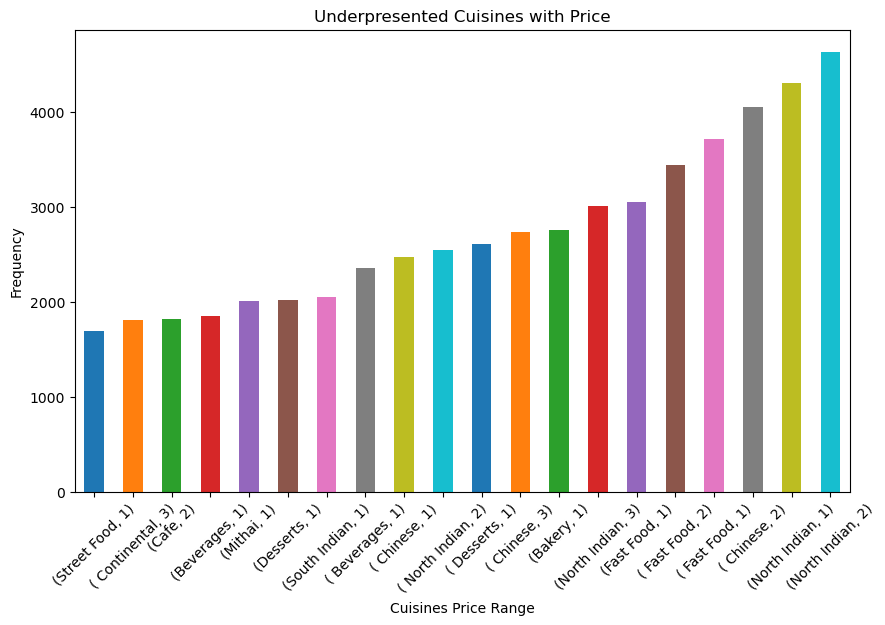

In [57]:
cousine_counts5 = df.groupby('cuisines_list')['price_range'].value_counts().sort_values()
plt.figure(figsize=(10, 6))
pastel_colors = sns.color_palette("tab10", n_colors=10)
cousine_counts5.tail(20).plot(kind= 'bar', color =pastel_colors)
plt.xticks(rotation=45)
plt.xlabel('Cuisines Price Range')
plt.ylabel('Frequency')
plt.title('Underpresented Cuisines with Price')
plt.show()